## Human Resources Department Prject

Develop a machine learning solution to predict employee attrition based on historical data, aiming to identify factors influencing employees' decisions to leave the company. The objective is to create a robust predictive model that enables proactive measures for employee retention.

In [1]:
DF_PATH = '../data/raw/Human_Resources.csv'
DF_SAVE_PATH = '../data/processed/HR_Processed.csv'

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
df = pd.read_csv(DF_PATH)
df.shape

(1470, 35)

#### Display random row

In [4]:
df.sample(1).iloc[0]

Age                                             39
Attrition                                       No
BusinessTravel                       Travel_Rarely
DailyRate                                     1387
Department                  Research & Development
DistanceFromHome                                10
Education                                        5
EducationField                             Medical
EmployeeCount                                    1
EmployeeNumber                                1618
EnvironmentSatisfaction                          2
Gender                                        Male
HourlyRate                                      76
JobInvolvement                                   3
JobLevel                                         2
JobRole                     Manufacturing Director
JobSatisfaction                                  1
MaritalStatus                              Married
MonthlyIncome                                 5377
MonthlyRate                    

#### Check data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Check data ranges and some other statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


> **Note:** There is a potential of applying scaling when we creat our model.

#### Check missing values

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Check for columns duplications

In [8]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

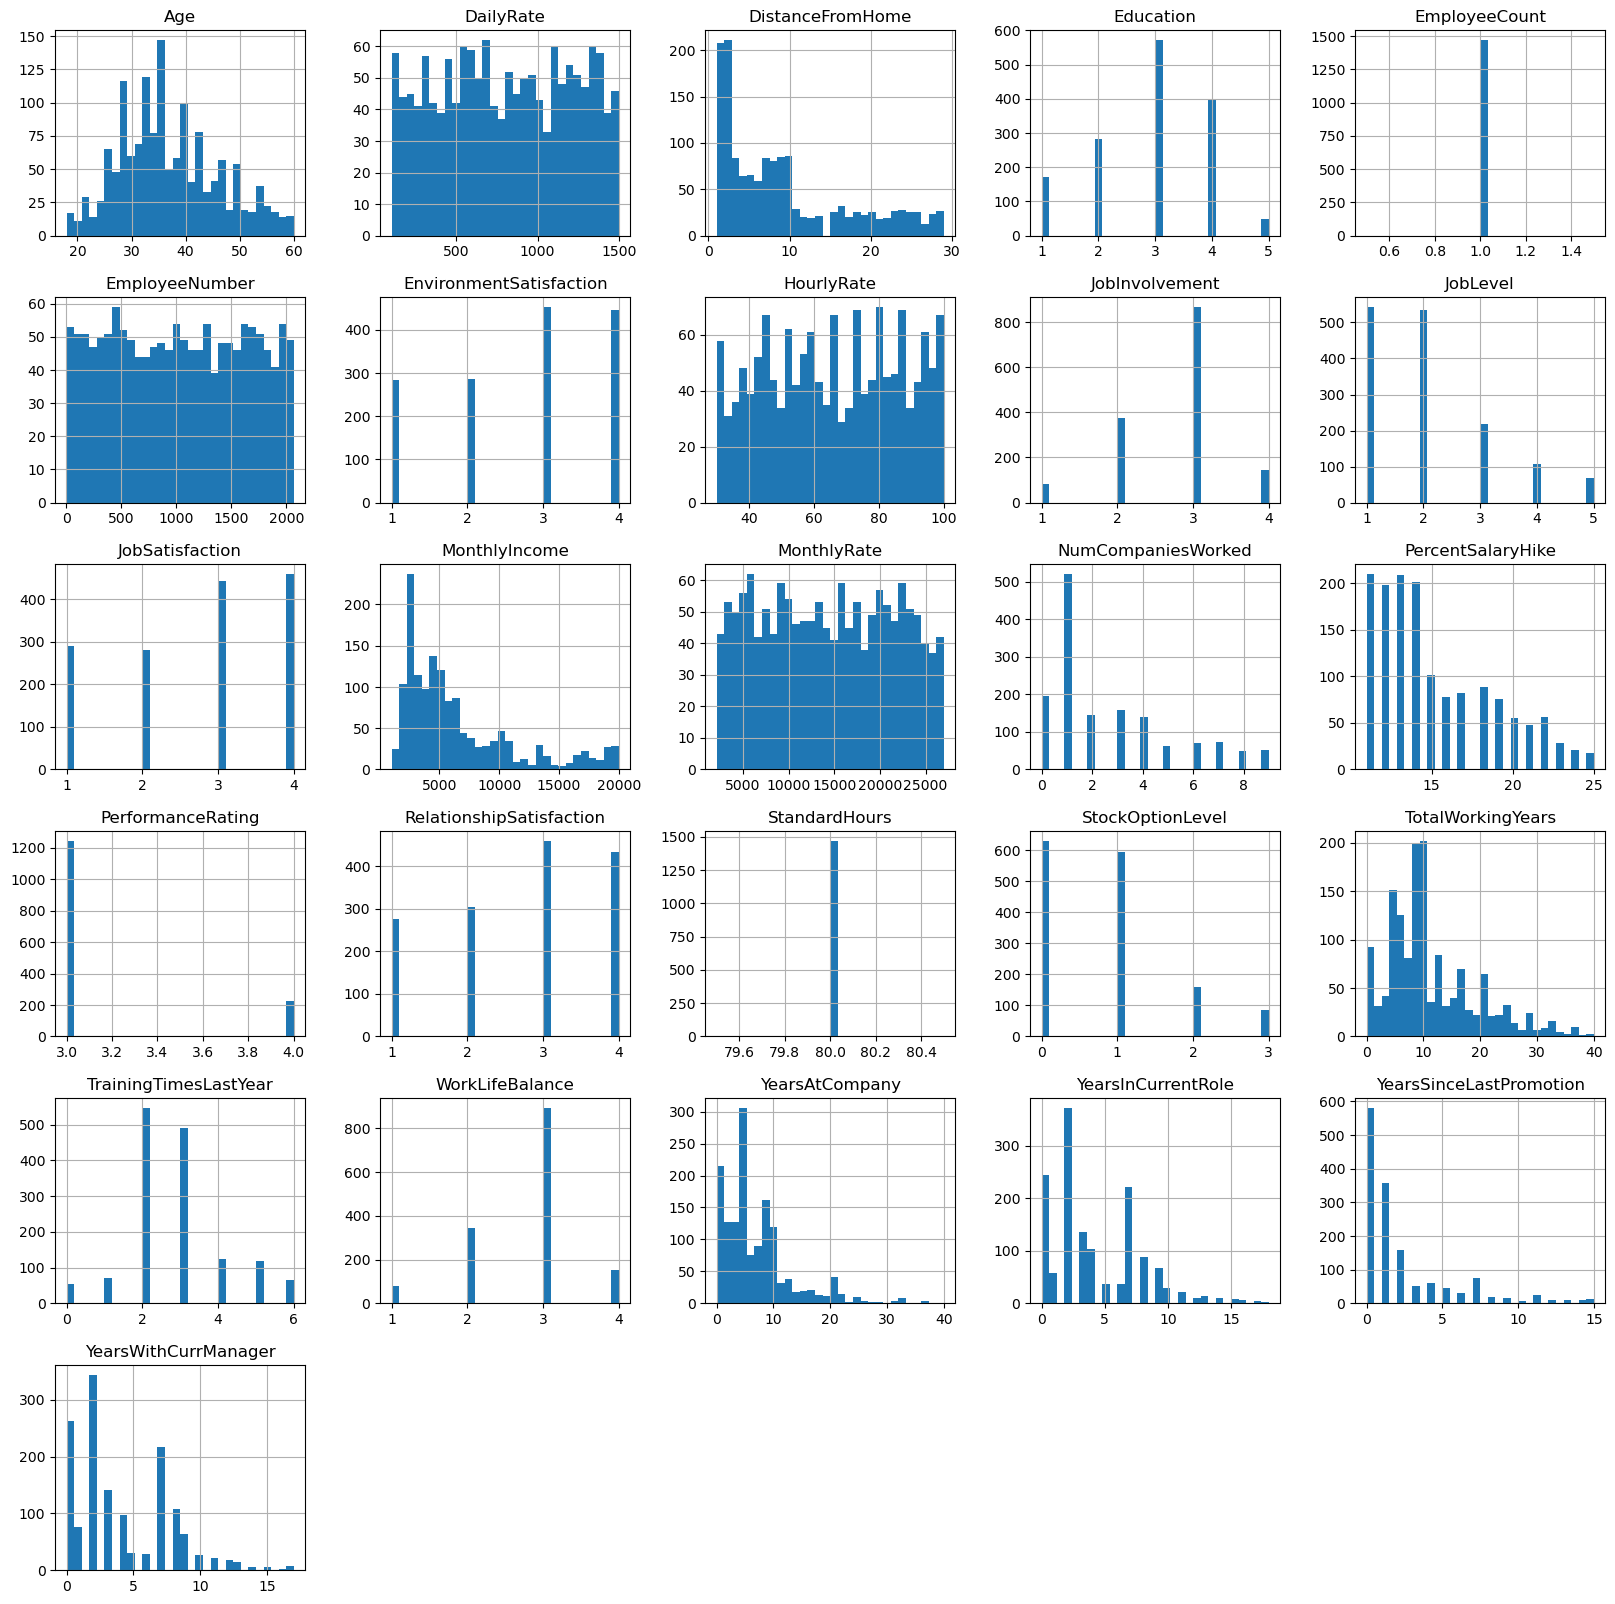

In [9]:
df.hist(bins=30, figsize=(20,20))

> **Conclusion Notes:**
> 1. There is no further preprocessing we can do in this dataset, only remove columns that doesn't have an indecation for anything in our dataset (EmployeeCount, EmployeeNumber, Over18, StandardHours), and encode column (Overtime) for model creation.
> 2. We will need to scale this data before get in the model (prefered to scale it with RobustScaler to handel possible outliers).